<a href="https://colab.research.google.com/github/prawizard/TweetsClassification_NLP/blob/main/Project/Hate_TweetEval_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.metrics import f1_score
import re
import requests

# Constants

In [ ]:
TRAIN_TEXT_URL="https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/hate/train_text.txt"
TRAIN_LABELS_URL="https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/hate/train_labels.txt"
VAL_TEXT_URL="https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/hate/val_text.txt"
VAL_LABELS_URL="https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/hate/val_labels.txt"
TEST_TEXT_URL="https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/hate/test_text.txt"
TEST_LABELS_URL="https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/hate/test_labels.txt"
VOCAB_SIZE=2000
LAPLACE_CONST=0.75

#Access Data from the Files

In [ ]:
r = requests.get(TRAIN_TEXT_URL, allow_redirects=True)
open('train_text.txt', 'wb').write(r.content)

r = requests.get(TRAIN_LABELS_URL, allow_redirects=True)
open('train_labels.txt', 'wb').write(r.content)

r = requests.get(VAL_TEXT_URL, allow_redirects=True)
open('val_text.txt', 'wb').write(r.content)

r = requests.get(VAL_LABELS_URL, allow_redirects=True)
open('val_labels.txt', 'wb').write(r.content)

r = requests.get(TEST_TEXT_URL, allow_redirects=True)
open('test_text.txt', 'wb').write(r.content)

r = requests.get(TEST_LABELS_URL, allow_redirects=True)
open('test_labels.txt', 'wb').write(r.content)

5940

In [ ]:
# temki = urllib.request.urlopen(TARGET_URL)
# type(temki)
# import requests

# response = requests.get(TARGET_URL)
# data = response.text
# type(data)
# data[1]
stream=open("train_text.txt")
tweets=stream.readlines()
stream.close()

val_stream=open("val_text.txt")
val_tweets=val_stream.readlines()
val_stream.close()

test_stream=open("test_text.txt")
test_tweets=test_stream.readlines()
test_stream.close()


In [ ]:
print(len(tweets), len(val_tweets))

9000 1000


In [ ]:
for i in range(len(tweets)):
  if tweets[i].find('@user')!=-1:
    # tweets[i] = tweets[i].replace('@user',"")
    tweets[i]=re.sub('@user', '', tweets[i])

for i in range(len(val_tweets)):
  if val_tweets[i].find('@user')!=-1:
    val_tweets[i]=re.sub('@user', '', val_tweets[i])

for i in range(len(test_tweets)):
  if test_tweets[i].find('@user')!=-1:
    test_tweets[i]=re.sub('@user', '', test_tweets[i])
# tweets    
# Words like effing converted to VetsResistSquadron

In [ ]:
# tweetStrings = [ tw for tw in tweetStrings if tw!='' and tw!=' '] 

In [ ]:
stream=open("train_labels.txt")
tweetsLabels=stream.readlines()
stream.close()

val_stream=open("val_labels.txt")
val_tweetsLabels=val_stream.readlines()
val_stream.close()

test_stream=open("test_labels.txt")
test_tweetsLabels=test_stream.readlines()
test_stream.close()

In [ ]:
labels=[0]*len(tweetsLabels)
for i in range(len(tweetsLabels)):
  if tweetsLabels[i].find('\n')!=-1:
    # tweets[i] = tweets[i].replace('@user',"")
    labels[i]=int(re.sub('\n', '', tweetsLabels[i]))
# labels    
# Words like effing converted to VetsResistSquadron

val_labels=[0]*len(val_tweetsLabels)
for i in range(len(val_tweetsLabels)):
  if val_tweetsLabels[i].find('\n')!=-1:
    # tweets[i] = tweets[i].replace('@user',"")
    val_labels[i]=int(re.sub('\n', '', val_tweetsLabels[i]))

test_labels=[0]*len(test_tweetsLabels)
for i in range(len(test_tweetsLabels)):
  if test_tweetsLabels[i].find('\n')!=-1:
    # tweets[i] = tweets[i].replace('@user',"")
    test_labels[i]=int(re.sub('\n', '', test_tweetsLabels[i]))

In [ ]:
print(len(labels), len(val_labels), len(test_labels))

9000 1000 2970


#Convert to DataFrame

In [ ]:
rows=[]
rowIndices=[]
for i in range(len(tweets)):
  rows.append({"TWEET":tweets[i], "CATEGORY":labels[i]})
  rowIndices.append(i+1)
df=pd.DataFrame(rows, index=rowIndices)

val_rows=[]
val_rowIndices=[]
for i in range(len(val_tweets)):
  val_rows.append({"TWEET":val_tweets[i], "CATEGORY":val_labels[i]})
  val_rowIndices.append(i+1)
val_df=pd.DataFrame(val_rows, index=val_rowIndices)

test_rows=[]
test_rowIndices=[]
for i in range(len(test_tweets)):
  test_rows.append({"TWEET":test_tweets[i], "CATEGORY":test_labels[i]})
  test_rowIndices.append(i+1)
test_df=pd.DataFrame(test_rows, index=test_rowIndices)

In [ ]:
print(df.head())
print(df.shape)
type(df.CATEGORY)

                                               TWEET  CATEGORY
1   nice new signage. Are you not concerned by Be...         0
2  A woman who you fucked multiple times saying y...         1
3    real talk do you have eyes or were they goug...         1
4  your girlfriend lookin at me like a groupie in...         1
5                          Hysterical woman like  \n         0
(9000, 2)


pandas.core.series.Series

In [ ]:
print(val_df.head())
print(val_df.shape)
type(val_df.CATEGORY)

                                               TWEET  CATEGORY
1    If book Claire wanted to "stay in the kitche...         0
2  After arriving in the EU refugees make protest...         0
3                                              😳👇 \n         0
4   Worst thing is if they are that stupid to thi...         1
5   Say's the HYSTERICAL woman. It is woman right...         0
(1000, 2)


pandas.core.series.Series

In [ ]:
print(test_df.head())
print(test_df.shape)
type(test_df.CATEGORY)

                                               TWEET  CATEGORY
1   , you are correct that Reid certainly is a we...         0
2          Whoever just unfollowed me you a bitch \n         1
3    Those People Invaded Us!!! They DO NOT BELIN...         1
4  stop JUDGING bitches by there cover, jus cuz s...         1
5  how about i knock heads off and send them gift...         1
(2970, 2)


pandas.core.series.Series

#Check for missing values or null tweets

In [ ]:
df.TWEET.isnull().values.any()

False

In [ ]:
val_df.TWEET.isnull().values.any()

False

In [ ]:
test_df.TWEET.isnull().values.any()

False

In [ ]:
df.CATEGORY.isnull().values.any()

False

In [ ]:
val_df.CATEGORY.isnull().values.any()

False

In [ ]:
test_df.CATEGORY.isnull().values.any()

False

In [ ]:
#Check if there are empty tweets(With string length zero).
(df.TWEET.str.len()==0).any()

False

In [ ]:
#Check if there are empty tweets(With string length zero).
(val_df.TWEET.str.len()==0).any()

False

In [ ]:
#Check if there are empty tweets(With string length zero).
(test_df.TWEET.str.len()==0).any()

False

#Offensive and non-offensive counts

In [ ]:
df.CATEGORY.value_counts()

0    5217
1    3783
Name: CATEGORY, dtype: int64

In [ ]:
val_df.CATEGORY.value_counts()

0    573
1    427
Name: CATEGORY, dtype: int64

In [ ]:
test_df.CATEGORY.value_counts()

0    1718
1    1252
Name: CATEGORY, dtype: int64

In [ ]:
num_offensive=df.CATEGORY.value_counts()[1]
num_nonoffensive=df.CATEGORY.value_counts()[0]

In [ ]:
val_num_offensive=val_df.CATEGORY.value_counts()[1]
val_num_nonoffensive=val_df.CATEGORY.value_counts()[0]

In [ ]:
test_num_offensive=test_df.CATEGORY.value_counts()[1]
test_num_nonoffensive=test_df.CATEGORY.value_counts()[0]

<function matplotlib.pyplot.show>

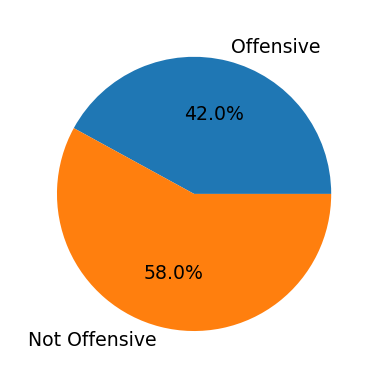

In [ ]:
categoryNames=['Offensive', 'Not Offensive']
sizes=[num_offensive, num_nonoffensive]
plt.figure(figsize=(2,2), dpi=227)
plt.pie(sizes, labels=categoryNames, textprops={'fontsize':6}, startangle=0, autopct='%1.1f%%')
plt.show

<function matplotlib.pyplot.show>

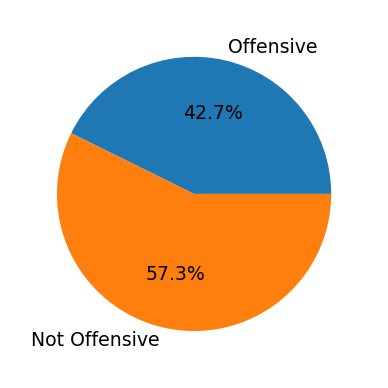

In [ ]:
categoryNames=['Offensive', 'Not Offensive']
sizes=[val_num_offensive, val_num_nonoffensive]
plt.figure(figsize=(2,2), dpi=227)
plt.pie(sizes, labels=categoryNames, textprops={'fontsize':6}, startangle=0, autopct='%1.1f%%')
plt.show

<function matplotlib.pyplot.show>

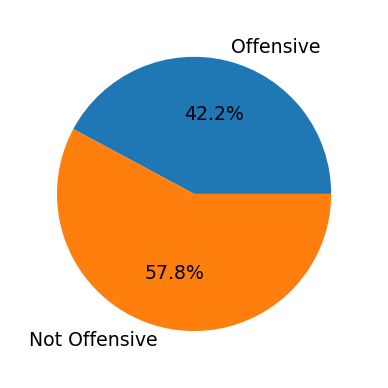

In [ ]:
categoryNames=['Offensive', 'Not Offensive']
sizes=[test_num_offensive, test_num_nonoffensive]
plt.figure(figsize=(2,2), dpi=227)
plt.pie(sizes, labels=categoryNames, textprops={'fontsize':6}, startangle=0, autopct='%1.1f%%')
plt.show

#NLP

###Text pre-processing

In [ ]:
st="Is the tweet Offensive or not?"
st.lower()

'is the tweet offensive or not?'

###Download NLTK Resources(Tokenizer & stopwords)

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

###Tokenize

In [ ]:
word_tokenize(st.lower())

['is', 'the', 'tweet', 'offensive', 'or', 'not', '?']

###Remove stop words. Word stemming

In [ ]:
stop_words=set(stopwords.words('english'))

In [ ]:
words=word_tokenize(st.lower())
filtered_words=[]
# stemmer=PorterStemmer()
stemmer=SnowballStemmer('english')
for word in words:
  if word not in stop_words:
    stemmed_word=stemmer.stem(word)
    filtered_words.append(stemmed_word)
filtered_words

['tweet', 'offens', '?']

###Removing punctuations

In [ ]:
words=word_tokenize(st.lower())
filtered_words=[]
# stemmer=PorterStemmer()
stemmer=SnowballStemmer('english')
for word in words:
  if word not in stop_words and word.isalpha():
    stemmed_word=stemmer.stem(word)
    filtered_words.append(stemmed_word)
filtered_words

['tweet', 'offens']

###Create a function for cleaning tweets

In [ ]:
def clean_tweets(tweet, stemmer=PorterStemmer(), stop_words=set(stopwords.words('english'))):
  words=word_tokenize(tweet.lower())
  filtered_words=[]
  for word in words:
    if word not in stop_words and word.isalpha():
      stemmed_word=stemmer.stem(word)
      filtered_words.append(stemmed_word)
  return filtered_words

In [ ]:
clean_tweets(st)

['tweet', 'offens']

In [ ]:
len(df)
type(df.TWEET[0:5])

pandas.core.series.Series

In [ ]:
# %%time
tweetsList=df.TWEET
nestedList=tweetsList.apply(clean_tweets)
nestedList[0:5]

1    [nice, new, signag, concern, beatlemania, hyst...
2    [woman, fuck, multipl, time, say, yo, dick, sm...
3                    [real, talk, eye, goug, rapefuge]
4            [girlfriend, lookin, like, groupi, bitch]
5                                [hyster, woman, like]
Name: TWEET, dtype: object

In [ ]:
# %%time
val_tweetsList=val_df.TWEET
val_nestedList=val_tweetsList.apply(clean_tweets)
val_nestedList[0:5]

1    [book, clair, want, stay, kitchen, cook, man, ...
2    [arriv, eu, refuge, make, protest, want, money...
3                                                   []
4    [worst, thing, stupid, think, roll, back, roe,...
5                   [say, hyster, woman, woman, right]
Name: TWEET, dtype: object

In [ ]:
# %%time
test_tweetsList=test_df.TWEET
test_nestedList=test_tweetsList.apply(clean_tweets)
test_nestedList[0:5]

1    [correct, reid, certainli, weasel, sadli, got,...
2                           [whoever, unfollow, bitch]
3    [peopl, invad, us, bele, right, americafirst, ...
4    [stop, judg, bitch, cover, ju, cuz, bad, mean,...
5    [knock, head, send, gift, wrap, mom, hous, dum...
Name: TWEET, dtype: object

In [ ]:
# %%time
flatList=[item for subitem in nestedList for item in subitem]
len(flatList)

101124

In [ ]:
# %%time
val_flatList=[item for subitem in val_nestedList for item in subitem]
len(val_flatList)

13171

In [ ]:
# %%time
test_flatList=[item for subitem in test_nestedList for item in subitem]
len(test_flatList)

35008

In [ ]:
tw_id_offensive=df[df.CATEGORY==1].index
tw_id_non_offensive=df[df.CATEGORY==0].index

val_tw_id_offensive=val_df[val_df.CATEGORY==1].index
val_tw_id_non_offensive=val_df[val_df.CATEGORY==0].index

test_tw_id_offensive=test_df[test_df.CATEGORY==1].index
test_tw_id_non_offensive=test_df[test_df.CATEGORY==0].index

In [ ]:
tw_nested_off=nestedList.loc[tw_id_offensive]
tw_nested_non_off=nestedList.loc[tw_id_non_offensive]

val_tw_nested_off=val_nestedList.loc[val_tw_id_offensive]
val_tw_nested_non_off=val_nestedList.loc[val_tw_id_non_offensive]

test_tw_nested_off=test_nestedList.loc[test_tw_id_offensive]
test_tw_nested_non_off=test_nestedList.loc[test_tw_id_non_offensive]

In [ ]:
flat_off=[item for subitem in tw_nested_off for item in subitem]
flat_non_off=[item for subitem in tw_nested_non_off for item in subitem]
off_words=pd.Series(flat_off).value_counts()
non_off_words=pd.Series(flat_non_off).value_counts()

# 5 most common words in offensive tweets
off_words[0:5]

bitch     918
illeg     593
immigr    579
fuck      425
women     394
dtype: int64

In [ ]:
val_flat_off=[item for subitem in val_tw_nested_off for item in subitem]
val_flat_non_off=[item for subitem in val_tw_nested_non_off for item in subitem]
val_off_words=pd.Series(val_flat_off).value_counts()
val_non_off_words=pd.Series(val_flat_non_off).value_counts()

# 5 most common words in offensive tweets
val_off_words[0:5]

fuck      99
bitch     92
immigr    74
illeg     70
hyster    67
dtype: int64

In [ ]:
test_flat_off=[item for subitem in test_tw_nested_off for item in subitem]
test_flat_non_off=[item for subitem in test_tw_nested_non_off for item in subitem]
test_off_words=pd.Series(test_flat_off).value_counts()
test_non_off_words=pd.Series(test_flat_non_off).value_counts()

# 5 most common words in offensive tweets
test_off_words[0:5]

bitch           654
hoe             376
illeg           264
deportthemal    149
fuck            148
dtype: int64

In [ ]:
# 5 most common words in non-offensive tweets
non_off_words[0:5]

immigr     1131
refuge      860
women       458
migrant     450
men         420
dtype: int64

In [ ]:
# 5 most common words in non-offensive tweets
val_non_off_words[0:5]

immigr    132
refuge    103
rape       98
women      89
woman      85
dtype: int64

In [ ]:
# 5 most common words in non-offensive tweets
test_non_off_words[0:5]

bitch           810
buildthatwal    352
maga            258
hoe             237
like            204
dtype: int64

In [ ]:
print("Off ",off_words.shape[0]," non-off ",non_off_words.shape[0])

print("Off ",val_off_words.shape[0]," non-off ",val_non_off_words.shape[0])

print("Off ",test_off_words.shape[0]," non-off ",test_non_off_words.shape[0])

Off  6977  non-off  8578
Off  2089  non-off  2614
Off  3487  non-off  4587


In [ ]:
stemmed_nested_list=df.TWEET.apply(clean_tweets)
flat_stemmed_list=[item for subitem in stemmed_nested_list for item in subitem]
unique_words=pd.Series(flat_stemmed_list).value_counts()
print("Number of unique words ",unique_words.shape[0])
unique_words.head()

Number of unique words  11626


immigr    1710
refuge    1178
bitch     1155
women      852
illeg      770
dtype: int64

In [ ]:
val_stemmed_nested_list=val_df.TWEET.apply(clean_tweets)
val_flat_stemmed_list=[item for subitem in val_stemmed_nested_list for item in subitem]
val_unique_words=pd.Series(val_flat_stemmed_list).value_counts()
print("Number of unique words ",val_unique_words.shape[0])
val_unique_words.head()

Number of unique words  3641


immigr    206
fuck      168
refuge    151
woman     135
women     131
dtype: int64

In [ ]:
test_stemmed_nested_list=test_df.TWEET.apply(clean_tweets)
test_flat_stemmed_list=[item for subitem in test_stemmed_nested_list for item in subitem]
test_unique_words=pd.Series(test_flat_stemmed_list).value_counts()
print("Number of unique words ",test_unique_words.shape[0])
test_unique_words.head()

Number of unique words  6204


bitch           1464
hoe              613
buildthatwal     465
maga             365
illeg            343
dtype: int64

In [ ]:
frequent_words=unique_words[0:VOCAB_SIZE]
frequent_words[0:10]

immigr     1710
refuge     1178
bitch      1155
women       852
illeg       770
migrant     719
like        717
fuck        687
get         627
go          534
dtype: int64

In [ ]:
val_frequent_words=val_unique_words[0:VOCAB_SIZE]
val_frequent_words[0:10]

immigr    206
fuck      168
refuge    151
woman     135
women     131
bitch     127
hyster    124
like      113
rape      102
illeg      95
dtype: int64

In [ ]:
test_frequent_words=test_unique_words[0:VOCAB_SIZE]
test_frequent_words[0:10]

bitch           1464
hoe              613
buildthatwal     465
maga             365
illeg            343
like             340
fuck             255
ass              237
nodaca           236
get              227
dtype: int64

In [ ]:
word_ids=list(range(0,VOCAB_SIZE))
vocab=pd.DataFrame({"VOCAB_WORD":frequent_words.index.values}, index=word_ids)
vocab.index.name="WORD_ID"
vocab.head()

,VOCAB_WORD
WORD_ID,
0,immigr
1,refuge
2,bitch
3,women
4,illeg


In [ ]:
val_word_ids=list(range(0,VOCAB_SIZE))
val_vocab=pd.DataFrame({"VOCAB_WORD":val_frequent_words.index.values}, index=word_ids)
val_vocab.index.name="WORD_ID"
val_vocab.head()

,VOCAB_WORD
WORD_ID,
0,immigr
1,fuck
2,refuge
3,woman
4,women


In [ ]:
test_word_ids=list(range(0,VOCAB_SIZE))
test_vocab=pd.DataFrame({"VOCAB_WORD":test_frequent_words.index.values}, index=word_ids)
test_vocab.index.name="WORD_ID"
test_vocab.head()

,VOCAB_WORD
WORD_ID,
0,bitch
1,hoe
2,buildthatwal
3,maga
4,illeg


In [ ]:
# saved file

#Generate feature and sparse matrix

###Creating a dataframe with one word per column

In [ ]:
type(stemmed_nested_list)
type(val_stemmed_nested_list)

pandas.core.series.Series

In [ ]:
word_columns_df=pd.DataFrame.from_records(stemmed_nested_list.to_list())
word_columns_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,nice,new,signag,concern,beatlemania,hyster,crowd,crongreg,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,woman,fuck,multipl,time,say,yo,dick,small,compliment,know,u,hit,spot,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,real,talk,eye,goug,rapefuge,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,girlfriend,lookin,like,groupi,bitch,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,hyster,woman,like,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [ ]:
val_word_columns_df=pd.DataFrame.from_records(val_stemmed_nested_list.to_list())
val_word_columns_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37
0,book,clair,want,stay,kitchen,cook,man,would,stay,inver,frank,research,outland,seri,would,end,less,two,chapter,long,perhap,want,prefer,stori,get,None,None,None,None,None,None,None,None,None,None,None,None,None
1,arriv,eu,refuge,make,protest,want,money,welcom,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,worst,thing,stupid,think,roll,back,roe,v,wade,realli,need,educ,scotu,work,probabl,paid,like,hyster,women,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,say,hyster,woman,woman,right,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [ ]:
test_word_columns_df=pd.DataFrame.from_records(test_stemmed_nested_list.to_list())
test_word_columns_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
0,correct,reid,certainli,weasel,sadli,got,weasel,sen,mcconnel,corrupt,mueller,investig,stop,maga,kag,potu,trump,news,voter,nodaca,usa,None,None,None,None,None,None,None,None,None,None,None,None
1,whoever,unfollow,bitch,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,peopl,invad,us,bele,right,americafirst,open,hous,ignor,ye,im,christian,nodaca,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,stop,judg,bitch,cover,ju,cuz,bad,mean,catch,shawdi,could,whore,da,opposit,keeper,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,knock,head,send,gift,wrap,mom,hous,dumb,raggedi,bird,bitch,ass,hoe,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [ ]:
# features:word_columns_df, labels: df.CATEGORY
word_columns_df.shape
# df.CATEGORY.at[1]

(9000, 40)

In [ ]:
# features:word_columns_df, labels: df.CATEGORY
val_word_columns_df.shape
# val_df.CATEGORY.at[1]

(1000, 38)

In [ ]:
# features:word_columns_df, labels: df.CATEGORY
test_word_columns_df.shape
# val_df.CATEGORY.at[1]

(2970, 33)

###Create a sparse matrix for the training data

In [ ]:
word_index=pd.Index(vocab.VOCAB_WORD)
type(word_index)

val_word_index=pd.Index(vocab.VOCAB_WORD)
type(val_word_index)

test_word_index=pd.Index(vocab.VOCAB_WORD)
type(test_word_index)

pandas.core.indexes.base.Index

In [ ]:
word_index.get_loc('gun')

907

In [ ]:
def make_sparse_matrix(df, indexed_words, labels):
  nr_rows=df.shape[0]
  nr_cols=df.shape[1]
  word_set=set(indexed_words)
  dict_list=[]

  for i in range(nr_rows):
    for j in range(nr_cols):
      word=df.iat[i,j]
      if word in word_set:
        tw_id=df.index[i]
        word_id=indexed_words.get_loc(word)
        category=labels.at[tw_id+1]
        item={'TWEET_ID': tw_id, 'LABEL':category , 'OCCURENCE':1, 'WORD_ID':word_id}

        dict_list.append(item)
  return pd.DataFrame(dict_list)

In [ ]:
%%time
sparse_train_df=make_sparse_matrix(word_columns_df, word_index, df.CATEGORY)

sparse_val_df=make_sparse_matrix(val_word_columns_df, val_word_index, val_df.CATEGORY)

sparse_test_df=make_sparse_matrix(test_word_columns_df, test_word_index, test_df.CATEGORY)

CPU times: user 11.4 s, sys: 39.8 ms, total: 11.4 s
Wall time: 11.4 s


In [ ]:
sparse_train_df[200:205]

,TWEET_ID,LABEL,OCCURENCE,WORD_ID
200,24,0,1,1169
201,24,0,1,361
202,24,0,1,709
203,24,0,1,709
204,24,0,1,84


In [ ]:
sparse_train_df.shape

(83361, 4)

In [ ]:
sparse_val_df.shape

(10730, 4)

In [ ]:
sparse_test_df.shape

(27959, 4)

In [ ]:
sparse_train_df[-5:]

,TWEET_ID,LABEL,OCCURENCE,WORD_ID
83356,8999,1,1,199
83357,8999,1,1,327
83358,8999,1,1,2
83359,8999,1,1,24
83360,8999,1,1,270


###Combine occurences

In [ ]:
train_grouped=sparse_train_df.groupby(['TWEET_ID', 'WORD_ID', 'LABEL']).sum()
train_grouped.head()

OCCURENCE
TWEET_ID WORD_ID LABEL           
0        41      0              1
         47      0              1
         383     0              1
         620     0              1
         1437    0              1

In [ ]:
val_grouped=sparse_val_df.groupby(['TWEET_ID', 'WORD_ID', 'LABEL']).sum()
val_grouped.head()

OCCURENCE
TWEET_ID WORD_ID LABEL           
0        8       0              1
         13      0              2
         37      0              2
         73      0              1
         119     0              2

In [ ]:
test_grouped=sparse_test_df.groupby(['TWEET_ID', 'WORD_ID', 'LABEL']).sum()
test_grouped.head()

OCCURENCE
TWEET_ID WORD_ID LABEL           
0        18      0              1
         31      0              1
         45      0              1
         74      0              1
         111     0              1

In [ ]:
train_grouped=train_grouped.reset_index()
train_grouped.head()

,TWEET_ID,WORD_ID,LABEL,OCCURENCE
0,0,41,0,1
1,0,47,0,1
2,0,383,0,1
3,0,620,0,1
4,0,1437,0,1


In [ ]:
val_grouped=val_grouped.reset_index()
val_grouped.head()

,TWEET_ID,WORD_ID,LABEL,OCCURENCE
0,0,8,0,1
1,0,13,0,2
2,0,37,0,2
3,0,73,0,1
4,0,119,0,2


In [ ]:
test_grouped=test_grouped.reset_index()
test_grouped.head()

,TWEET_ID,WORD_ID,LABEL,OCCURENCE
0,0,18,0,1
1,0,31,0,1
2,0,45,0,1
3,0,74,0,1
4,0,111,0,1


In [ ]:
vocab.at[7,'VOCAB_WORD']

'fuck'

In [ ]:
df.TWEET[1]

' nice new signage. Are you not concerned by Beatlemania -style hysterical crowds crongregating on you… \n'

In [ ]:
print(train_grouped.shape ,val_grouped.shape, test_grouped.shape)

(78904, 4) (10003, 4) (26598, 4)


###DataFrame to numpy array

In [ ]:
sparse_train_data=train_grouped.to_numpy()
sparse_train_data[:5]

array([[   0,   41,    0,    1],
       [   0,   47,    0,    1],
       [   0,  383,    0,    1],
       [   0,  620,    0,    1],
       [   0, 1437,    0,    1]])

In [ ]:
sparse_val_data=val_grouped.to_numpy()
sparse_val_data[:5]

array([[  0,   8,   0,   1],
       [  0,  13,   0,   2],
       [  0,  37,   0,   2],
       [  0,  73,   0,   1],
       [  0, 119,   0,   2]])

In [ ]:
sparse_test_data=test_grouped.to_numpy()
sparse_test_data[:5]

array([[  0,  18,   0,   1],
       [  0,  31,   0,   1],
       [  0,  45,   0,   1],
       [  0,  74,   0,   1],
       [  0, 111,   0,   1]])

In [ ]:
sparse_train_data[-5:]

array([[8999,  290,    1,    1],
       [8999,  327,    1,    1],
       [8999,  568,    1,    1],
       [8999, 1135,    1,    1],
       [8999, 1288,    1,    1]])

In [ ]:
sparse_train_data.shape

(78904, 4)

In [ ]:
sparse_val_data.shape

(10003, 4)

In [ ]:
sparse_test_data.shape

(26598, 4)

In [ ]:
print("Number of tweets in the training set : ",np.unique(sparse_train_data[:,0]).size)
print("Number of tweets in the val set : ",np.unique(sparse_val_data[:,0]).size)
print("Number of tweets in the test set : ",np.unique(sparse_test_data[:,0]).size)

Number of tweets in the training set :  8948
Number of tweets in the val set :  997
Number of tweets in the test set :  2970


##Full matrix

###Create a dataframe

In [ ]:
column_names=['TWEET_ID']+['CATEGORY']+list(range(0,VOCAB_SIZE))
column_names[:5]

['TWEET_ID', 'CATEGORY', 0, 1, 2]

In [ ]:
len(column_names)

2002

In [ ]:
index_names=np.unique(sparse_train_data[:,0])
index_names

array([   0,    1,    2, ..., 8997, 8998, 8999])

In [ ]:
full_train_data=pd.DataFrame(index=index_names, columns=column_names)
full_train_data.head()

,TWEET_ID,CATEGORY,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
full_train_data.fillna(value=0, inplace=True)
full_train_data.head()

,TWEET_ID,CATEGORY,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


###Create a full matrix from sparse matrix

In [ ]:
def make_full_matrix(sparse_matrix, nr_words, tw_idx=0, word_idx=1, cat_idx=2, freq_idx=3):
    column_names=['TWEET_ID']+['CATEGORY']+list(range(0,VOCAB_SIZE))
    tw_id_names=np.unique(sparse_matrix[:,0])
    full_matrix=pd.DataFrame(index=tw_id_names, columns=column_names)
    full_matrix.fillna(value=0, inplace=True)

    for i in range(sparse_matrix.shape[0]):
      tw_nr=sparse_matrix[i][tw_idx]
      word_id=sparse_matrix[i][word_idx]
      label=sparse_matrix[i][cat_idx]
      occurence=sparse_matrix[i][freq_idx]

      full_matrix.at[tw_nr, 'TWEET_ID']=tw_nr
      full_matrix.at[tw_nr, 'CATEGORY']=label
      full_matrix.at[tw_nr, word_id]=occurence

    full_matrix.set_index('TWEET_ID', inplace=True)
    return full_matrix

In [ ]:
%%time
full_train_data=make_full_matrix(sparse_train_data, VOCAB_SIZE)

CPU times: user 7.74 s, sys: 124 ms, total: 7.86 s
Wall time: 7.88 s


In [ ]:
full_train_data.head()

,CATEGORY,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
TWEET_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
full_train_data.tail()

,CATEGORY,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
TWEET_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8995,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8996,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8997,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8999,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# %%time
full_val_data=make_full_matrix(sparse_val_data, nr_words=VOCAB_SIZE)
full_val_data.head()

,CATEGORY,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
TWEET_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# %%time
full_test_data=make_full_matrix(sparse_test_data, nr_words=VOCAB_SIZE)
full_test_data.head()

,CATEGORY,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
TWEET_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_val = full_val_data.loc[:, full_val_data.columns != 'CATEGORY']
y_val = full_val_data.CATEGORY

In [ ]:
X_test = full_test_data.loc[:, full_test_data.columns != 'CATEGORY']
y_test = full_test_data.CATEGORY

In [ ]:
print(X_val.shape, y_val.shape, full_val_data.shape, full_train_data.shape, full_test_data.shape)

(997, 2000) (997,) (997, 2001) (8948, 2001) (2970, 2001)


#Naive Bayes Model

###Probability of Offensive

In [ ]:
prob_off = full_train_data.CATEGORY.sum()/full_train_data.CATEGORY.size
prob_off

0.4223290120697363

###Total number of words/tokens

In [ ]:
full_train_features = full_train_data.loc[:, full_train_data.columns != 'CATEGORY']
full_train_features.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
TWEET_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
tweet_lengths=full_train_features.sum(axis=1)
tweet_lengths.shape

(8948,)

In [ ]:
tweet_lengths[:5]

TWEET_ID
0     5
1    12
2     4
3     3
4     3
dtype: int64

In [ ]:
total_wc=tweet_lengths.sum()
total_wc

83361

###Number of tokens in Offensive and non offensive tweets

In [ ]:
off_lengths=tweet_lengths[full_train_data.CATEGORY==1]
off_lengths.shape

(3779,)

In [ ]:
off_wc=off_lengths.sum()
off_wc

37907

In [ ]:
non_off_lengths=tweet_lengths[full_train_data.CATEGORY==0]
non_off_lengths.shape

(5169,)

In [ ]:
non_off_wc=non_off_lengths.sum()
non_off_wc

45454

In [ ]:
tweet_lengths.shape[0]-off_lengths.shape[0]-non_off_lengths.shape[0]

0

In [ ]:
print("Avg number of words in offensive tweet : ", off_wc/off_lengths.shape[0])
print("Avg number of words in non offensive tweet : ", non_off_wc/non_off_lengths.shape[0])

Avg number of words in offensive tweet :  10.030960571579783
Avg number of words in non offensive tweet :  8.793577094215516


###Summing the tokens in offensive tweets

In [ ]:
full_train_features.shape

(8948, 2000)

In [ ]:
train_off_tokens=full_train_features.loc[full_train_data.CATEGORY==1]
train_off_tokens.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
TWEET_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
summed_off_tokens=train_off_tokens.sum(axis=0)+LAPLACE_CONST
summed_off_tokens.shape

(2000,)

###Summing the tokens in non offensive tweets

In [ ]:
train_non_off_tokens=full_train_features.loc[full_train_data.CATEGORY==0]
train_non_off_tokens.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
TWEET_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
summed_non_off_tokens=train_non_off_tokens.sum(axis=0)+LAPLACE_CONST
summed_non_off_tokens.shape

(2000,)

###P(token|offensive)

In [ ]:
prob_token_off=summed_off_tokens/(off_wc+(LAPLACE_CONST*VOCAB_SIZE))
prob_token_off[:5]

0    0.014712
1    0.008089
2    0.023314
3    0.010017
4    0.015067
dtype: float64

In [ ]:
prob_token_off.sum()

0.9999999999999999

###P(token|not offensive)

In [ ]:
prob_token_non_off=summed_non_off_tokens/(non_off_wc+(LAPLACE_CONST*VOCAB_SIZE))
prob_token_non_off[:5]

0    0.024103
1    0.018332
2    0.005063
3    0.009770
4    0.003786
dtype: float64

In [ ]:
prob_token_non_off.sum()

1.0

###P(token)

In [ ]:
prob_tokens_all=full_train_features.sum(axis=0)/total_wc

In [ ]:
prob_tokens_all.sum()

1.0

###Set the Prior

$$P(Off \, | \, X) = \frac{P(X \, | \, Off) \, P(Off)} {P(X)}$$

In [ ]:
prob_off

0.4223290120697363

In [ ]:
X_val=X_val.to_numpy()
y_val=y_val.to_numpy()
X_test=X_test.to_numpy()
y_test=y_test.to_numpy()
prob_token_off=prob_token_off.to_numpy()
prob_token_non_off=prob_token_non_off.to_numpy()
prob_tokens_all=prob_tokens_all.to_numpy()

In [ ]:
np.log(prob_token_off)
prob_token_off.shape

(2000,)

###Joint probability in log format

In [ ]:
joint_log_off_val = X_val.dot(np.log(prob_token_off) - np.log(prob_tokens_all)) + np.log(prob_off)
joint_log_non_off_val = X_val.dot(np.log(prob_token_non_off) - np.log(prob_tokens_all)) + np.log(1-prob_off)

In [ ]:
joint_log_off_test = X_test.dot(np.log(prob_token_off) - np.log(prob_tokens_all)) + np.log(prob_off)
joint_log_non_off_test = X_test.dot(np.log(prob_token_non_off) - np.log(prob_tokens_all)) + np.log(1-prob_off)

In [ ]:
joint_log_off_val[:5]

array([-4.98835241, -2.61681658, -1.01009942, -1.61766444, -2.8790383 ])

In [ ]:
joint_log_off_val.size

997

In [ ]:
joint_log_non_off_val[:5]

array([ 0.28877406, -0.09098071, -1.06756302, -0.28279124,  0.22796629])

In [ ]:
joint_log_non_off_val.size

997

In [ ]:
joint_log_non_off_test.size

2970

# Making Predictions

### Checking for the higher joint probability

$$P(Off \, | \, X) \, > \, P(NonOff \, | \, X)$$
<center>**OR**</center>
<br>
$$P(Off \, | \, X) \, < \, P(NonOff \, | \, X)$$

In [ ]:
# prediction_val = joint_log_off_val > joint_log_non_off_val

In [ ]:
prediction_test = joint_log_off_test > joint_log_non_off_test

In [ ]:
# prediction_val[-5:]*1

In [ ]:
# y_val.size

In [ ]:
# y_val[-5:]*1

In [ ]:
prediction_test[15:20]*1

array([1, 1, 1, 1, 1])

In [ ]:
y_test[15:20]

array([0, 1, 1, 1, 1])

###Simplify

In [ ]:
joint_log_off_val = X_val.dot(np.log(prob_token_off)) + np.log(prob_off)
joint_log_non_off_val = X_val.dot(np.log(prob_token_non_off)) + np.log(1-prob_off)

In [ ]:
joint_log_off_test = X_test.dot(np.log(prob_token_off)) + np.log(prob_off)
joint_log_non_off_test = X_test.dot(np.log(prob_token_non_off)) + np.log(1-prob_off)

In [ ]:
# correct_tweets_val = (y_val == prediction_val).sum()
# print('Val tweets classified correctly', correct_tweets_val)
# numTweets_wrong_val = X_val.shape[0] - correct_tweets_val
# print('Val tweets classified incorrectly', numTweets_wrong_val)

#Result

In [ ]:
correct_tweets_test = (y_test == prediction_test).sum()
print('Test tweets classified correctly', correct_tweets_test)
numTweets_wrong_test = X_test.shape[0] - correct_tweets_test
print('Test tweets classified incorrectly', numTweets_wrong_test)

Test tweets classified correctly 1409
Test tweets classified incorrectly 1561


In [ ]:
# correct_tweets_val/len(X_val)

In [ ]:
correct_tweets_test/len(X_test)

0.4744107744107744

In [ ]:
print("Accuracy on test set : ",round(correct_tweets_test/len(X_test)*100,2),"%")

Accuracy on test set :  47.44 %


In [ ]:
round(f1_score(y_true=y_test, y_pred=prediction_test, average='binary'),2)

0.61